# Lectura y visualización de Raster y Shapefiles

Crea un ambiente e instala las siguientes librerías:

``` bash
conda create -n raster_shp
conda install gdal rasterio fiona geopandas matplotlib xarray netcdf4 ipykernel

```

## Importar librerias **`Rasterio`**, **`Geopandas`** y **`Gdal`**. 

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr

In [2]:
!rm dem_pros/*

## Leer raster

In [3]:
# Abri el raster
raster_path = "../data/raster/dem_AG.tif"
with rasterio.open(raster_path) as src:
    raster_data = src.read(1)  # Read the first band
    nodata_value = src.nodata
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

In [5]:
print(extent)

[-77.64691826, -77.608141497, -8.982082532, -8.947915817]


In [6]:
print(nodata_value)

None


In [7]:
raster_data

array([[4989, 4987, 4987, ..., 5386, 5393, 5400],
       [4996, 4991, 4991, ..., 5393, 5399, 5404],
       [5011, 5007, 5009, ..., 5388, 5396, 5399],
       ...,
       [4235, 4240, 4246, ..., 4793, 4780, 4767],
       [4230, 4232, 4238, ..., 4794, 4781, 4772],
       [4228, 4232, 4237, ..., 4799, 4786, 4776]],
      shape=(123, 140), dtype=int16)

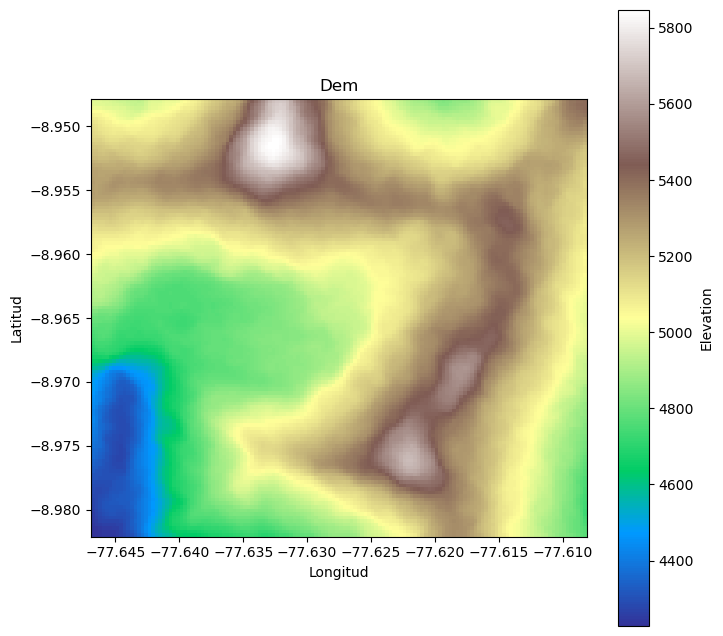

In [8]:
# Plot the raster
plt.figure(figsize=(8,8))
plt.imshow(raster_data, cmap="terrain", extent=extent)
plt.colorbar(label="Elevation")
plt.title("Dem")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

In [9]:
# Abrir shapefile
gdf = gpd.read_file("../data/shp/artesonraju_glacier_sentinel_f.shp")
gdf

,OID_,Name,FolderPath,SymbolID,AltMode,Base,Clamped,Extruded,Snippet,PopupInfo,Shape_Leng,Shape_Area,geometry
0,0,Placemark,artesonraju_glacier_sentinel.shp/artesonraju_g...,0,0,0.0,-1,0,None,None,0.142779,0.000427,"POLYGON Z ((-77.63927 -8.96351 0, -77.63642 -8..."


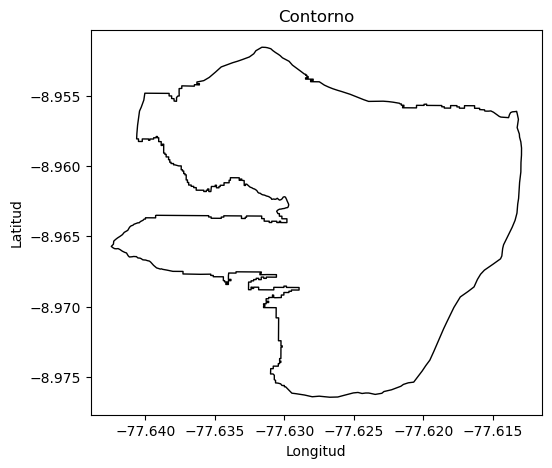

In [10]:
# Plot the shapefile
gdf.plot(figsize=(7,5), edgecolor="black", facecolor="none")
plt.title("Contorno")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

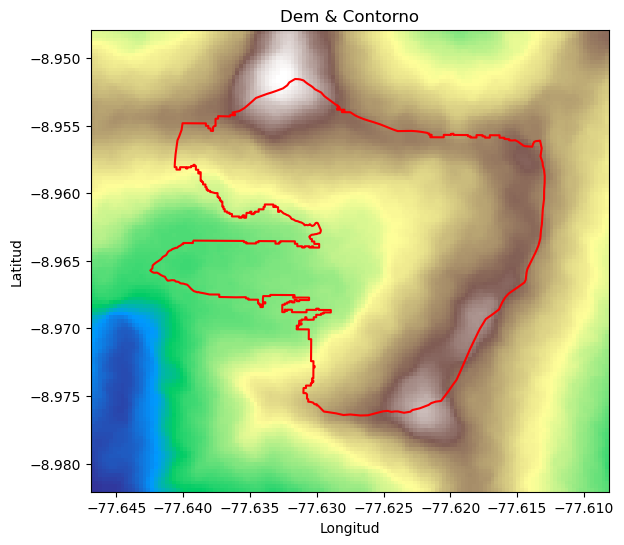

In [11]:
fig, ax = plt.subplots(figsize=(8,6))

# Plot raster
ax.imshow(raster_data, cmap="terrain", extent=extent)

# Plot shapefile
gdf.plot(ax=ax, edgecolor="red", facecolor="none", linewidth=1.5)

plt.title("Dem & Contorno")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

In [12]:
gdf.total_bounds

array([-77.64246098,  -8.97644361, -77.61293477,  -8.95156091])

In [10]:
import os

## Recortar el dominio del DEM

In [23]:
### Para reducir el tamaño del DEM, utilice las siguientes esquinas de latitud y longitud
longitude_upper_left = '-77.645'
latitude_upper_left = '-8.950'
longitude_lower_right = '-77.610'
latitude_lower_right = '-8.980'

In [24]:
### Si no desea reducir el DEM, comente lo siguiente en tres líneas
os.system('gdal_translate -projwin ' + longitude_upper_left + ' ' + latitude_upper_left + ' ' +
          longitude_lower_right + ' ' + latitude_lower_right + ' ' + '../data/raster/dem_AG.tif' + 
          ' ' + './dem_pros/dem_AG_clip.tif')


Input file size is 140, 123
0...10...20...30...40...50...60...70...80...90...100 - done.


0

In [25]:
# Abrir el archivo raster
raster_path = "./dem_pros/dem_AG_clip.tif"
with rasterio.open(raster_path) as src:
    raster_data = src.read(1)  # Read the first band
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
print(extent)

[-77.64525639872858, -77.61035731202858, -8.979860306634146, -8.949860264195122]


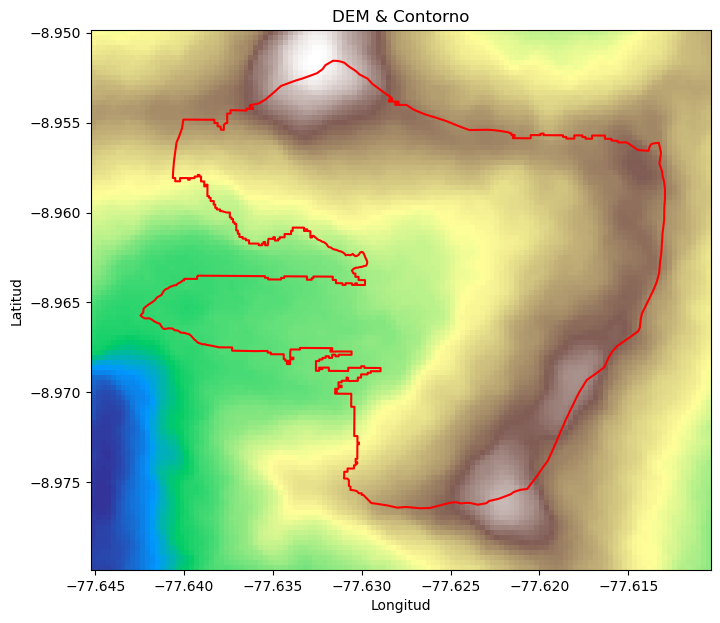

In [26]:
fig, ax = plt.subplots(figsize=(8,8))

# Plot raster
ax.imshow(raster_data, cmap="terrain", extent=extent)

# Plot shapefile
gdf.plot(ax=ax, edgecolor="red", facecolor="none", linewidth=1.5)

plt.title("DEM & Contorno")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

## Cambiar la resolucion del DEM

In [ ]:
### Cambiar resolución de raster
aggregate_degree = '0.005'
os.system('gdalwarp -tr ' + aggregate_degree + ' ' + aggregate_degree + ' -r average ' +  
          './dem_pros/dem_AG_clip.tif' + ' ' + './dem_pros/dem_AG_clip_res_100.tif')

Creating output file that is 7P x 6L.
Processing ./dem_pros/dem_AG_clip.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


0

In [40]:
# Abrir el archivo raster
raster_path = "./dem_pros/dem_AG_clip_res.tif"
with rasterio.open(raster_path) as src:
    raster_data = src.read(1)  # Read the first band
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
print(extent)

[-77.64525639872858, -77.61025639872858, -8.979860264195121, -8.949860264195122]


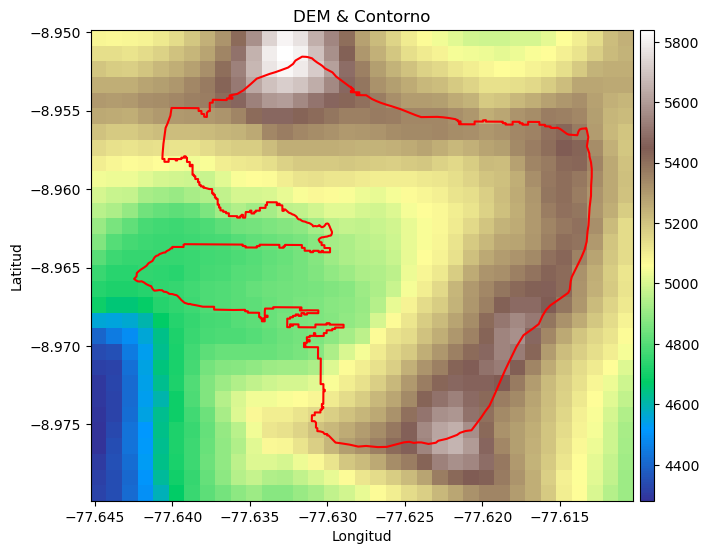

In [42]:
fig, ax = plt.subplots(figsize=(7,9))

# Plot raster
cf = ax.imshow(raster_data, cmap="terrain", extent=extent)
# Plot shapefile
gdf.plot(ax=ax, edgecolor="red", facecolor="none", linewidth=1.5)

plt.title("DEM & Contorno")
plt.xlabel("Longitud")
plt.ylabel("Latitud")

cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
fig.colorbar(cf, shrink=0.85, cax=cax)

plt.show()

## Convertir tiff para NetCDF

In [43]:
### Convertir DEM de tif a NetCDF
os.system('gdal_translate -of NETCDF ' + "./dem_pros/dem_AG_clip_res.tif"  + ' ' + './dem_pros/dem_AG.nc')

Input file size is 35, 30
0...10...20...30...40...50...60...70...80...90...100 - done.


0

## Crear un mascara

In [44]:
os.system('gdalwarp -of NETCDF  --config GDALWARP_IGNORE_BAD_CUTLINE YES -cutline ' + "../data/shp/artesonraju_glacier_sentinel_f.shp" + ' ' + 
          "./dem_pros/dem_AG_clip_res.tif"  + ' ' + "./dem_pros/mask_AG.nc")

Creating output file that is 35P x 30L.
Processing ./dem_pros/dem_AG_clip_res.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


0

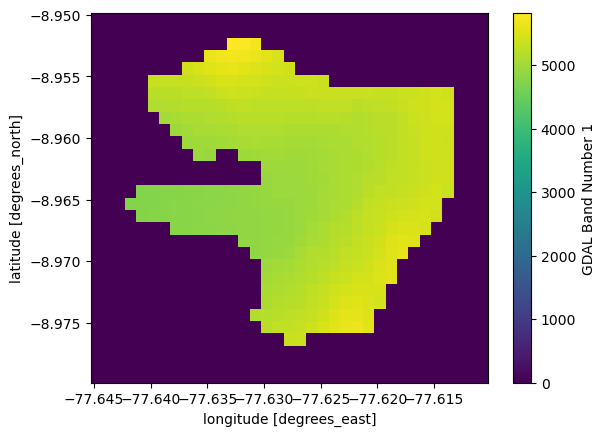

In [13]:
mask = xr.open_dataset('./dem_pros/mask_AG.nc')
mask.Band1.plot()

## Remplazar valores negativos del dem 

In [14]:
dem = xr.open_dataset('./dem_pros/dem_AG.nc')
dem

<xarray.Dataset> Size: 5kB
Dimensions:  (lat: 30, lon: 35)
Coordinates:
  * lat      (lat) float64 240B -8.979 -8.978 -8.977 ... -8.952 -8.951 -8.95
  * lon      (lon) float64 280B -77.64 -77.64 -77.64 ... -77.61 -77.61 -77.61
Data variables:
    crs      |S1 1B ...
    Band1    (lat, lon) float32 4kB ...
Attributes:
    GDAL_AREA_OR_POINT:  Area
    Conventions:         CF-1.5
    GDAL:                GDAL 3.6.2, released 2023/01/02
    history:             Mon Jul 21 23:42:35 2025: GDAL CreateCopy( ./dem_pro...

<xarray.DataArray 'Band1' ()> Size: 8B
array(4281.)
<xarray.DataArray 'Band1' ()> Size: 8B
array(5839.)


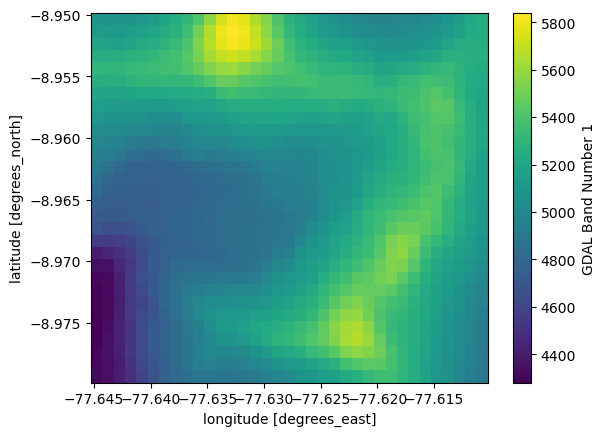

In [15]:
print(dem.Band1.min())
print(dem.Band1.max())
dem.Band1.plot()


In [16]:
dem.Band1.values

array([[4320., 4343., 4411., ..., 5005., 4946., 4908.],
       [4315., 4343., 4407., ..., 5013., 4963., 4912.],
       [4304., 4352., 4420., ..., 5019., 4974., 4917.],
       ...,
       [5197., 5179., 5170., ..., 5240., 5253., 5251.],
       [5134., 5135., 5126., ..., 5171., 5220., 5238.],
       [5080., 5074., 5079., ..., 5144., 5213., 5246.]],
      shape=(30, 35), dtype=float32)

In [17]:
array = dem.Band1.values
array[np.isnan(array)] = 0
array[array < 0] = 0
dem['Band1'][:] = array
dem.to_netcdf('./dem_pros/dem_AG_fill.nc') ## guardar un netcdf

## Obtener la pediente y el aspecto

In [18]:
### Calcular pendiente como NetCDF a partir de DEM
os.system('gdaldem slope -of NETCDF ' + './dem_pros/dem_AG_fill.nc' + ' ' + './dem_pros/slope_AG.nc' + ' -s 111120')

### Calcular el aspecto como NetCDF a partir de DEM
os.system('gdaldem aspect -of NETCDF ' + './dem_pros/dem_AG_fill.nc' + ' ' + './dem_pros/aspect_AG.nc')

0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.


0

In [1]:
#gdal_translate -projwin -77.644817346 -8.950027537 -77.610486182 -8.978467554 -a_nodata -9999.0 -of GTiff
#/home/lacrio/Documents/CURSO_ANA/data/raster/dem_AG.tif /tmp/processing_YWjXQv/79db0efff23a4c50a1c9552105991a38/OUTPUT.tif